### Decision Tree Regression !

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic = sns.load_dataset( "titanic" )
df = pd.DataFrame( titanic )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.head(11)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
df.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [6]:
df = df.drop( columns = ['alive','class', 'alone', 'embark_town', 'who', 'adult_male', 'deck'] )
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

(-10.0, 100.0)

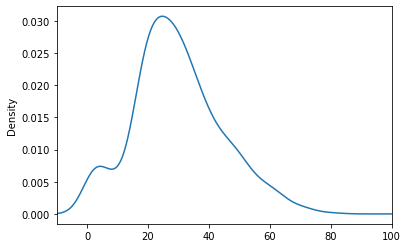

In [8]:
df[ "age" ].plot( kind = "density" )
plt.xlim( -10 , 100 )

In [9]:
import math
age_ave = math.floor(df.age.mean())

df.age = df.age.fillna( age_ave )

In [10]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

<AxesSubplot:xlabel='embarked', ylabel='count'>

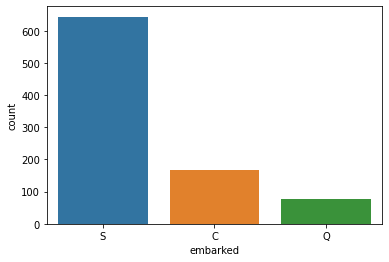

In [11]:
sns.countplot( x = df["embarked"] , data = df )

In [12]:
df.embarked = df.embarked.fillna( "S" )

In [13]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [14]:
df.head(11)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,29.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [15]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [16]:
df["sex"] = df["sex"].map(
    { 'male' : 0 , 'female' : 1 }
)

c:\Users\straw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

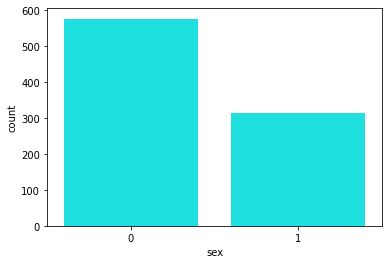

In [17]:
sns.countplot( df["sex"], color= 'cyan' )

c:\Users\straw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='survived'>

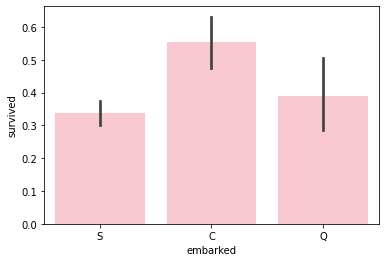

In [18]:
sns.barplot( "embarked" , "survived", data = df, color = "pink",  )

In [19]:
df["embarked"] = df["embarked"].map( {
    "S" : 1 , "C" : 2 , "Q" : 3
} )

In [20]:
y = df["survived"]
x = df.drop( "survived", axis=1 )

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size = 0.7 ,test_size = 0.3 , random_state = 0)

In [22]:
xtrain

,pclass,sex,age,sibsp,parch,fare,embarked
857,1,0,51.0,0,0,26.5500,1
52,1,1,49.0,1,0,76.7292,2
386,3,0,1.0,5,2,46.9000,1
124,1,0,54.0,0,1,77.2875,1
578,3,1,29.0,1,0,14.4583,2
...,...,...,...,...,...,...,...
835,1,1,39.0,1,1,83.1583,2
192,3,1,19.0,1,0,7.8542,1
629,3,0,29.0,0,0,7.7333,3
559,3,1,36.0,1,0,17.4000,1


In [23]:
ytrain

857    1
52     1
386    0
124    0
578    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: survived, Length: 623, dtype: int64

In [24]:
xtrain

,pclass,sex,age,sibsp,parch,fare,embarked
857,1,0,51.0,0,0,26.5500,1
52,1,1,49.0,1,0,76.7292,2
386,3,0,1.0,5,2,46.9000,1
124,1,0,54.0,0,1,77.2875,1
578,3,1,29.0,1,0,14.4583,2
...,...,...,...,...,...,...,...
835,1,1,39.0,1,1,83.1583,2
192,3,1,19.0,1,0,7.8542,1
629,3,0,29.0,0,0,7.7333,3
559,3,1,36.0,1,0,17.4000,1


In [25]:
ytrain.shape

(623,)

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

dectree = DecisionTreeRegressor( random_state = 0 )
dectree.fit( xtrain , ytrain )
ypred = dectree.predict( xtest )
ypred2 = []

for x in ypred :
    if( x >= 0.5 ) : ypred2.append(1)
    else : ypred2.append(0)

ypred = np.array( ypred2 )
ypred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

'accuracy_score = 0.7835820895522388'

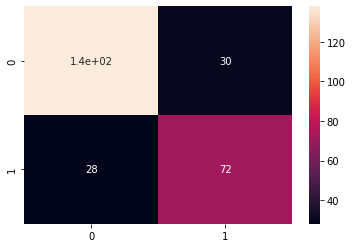

In [41]:
from sklearn.metrics import accuracy_score , confusion_matrix

cf = confusion_matrix( ytest, ypred )

sns.heatmap( cf, annot=True )

f"accuracy_score = {accuracy_score( ytest , ypred )}"